In [81]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
# Extracting the Data
data = pd.read_csv('E:/Health Insurance Prediction/train.csv')

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Data Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.isna().sum() # No null values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
data.dtypes 

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
# 3 object columns are there 
# since Id may not be useful for our analysis we can drop that

In [9]:
df = data.drop(['id'], axis=1)

In [10]:
df['Response'].value_counts() 
# People who are interested are so less

0    334399
1     46710
Name: Response, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [12]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [13]:
df['Region_Code'].value_counts() # more no of people are in the region 28

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [14]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [15]:
df['Vehicle_Age'].value_counts() # Most of people's vehicle age is between 1-2 year

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [16]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

# EDA

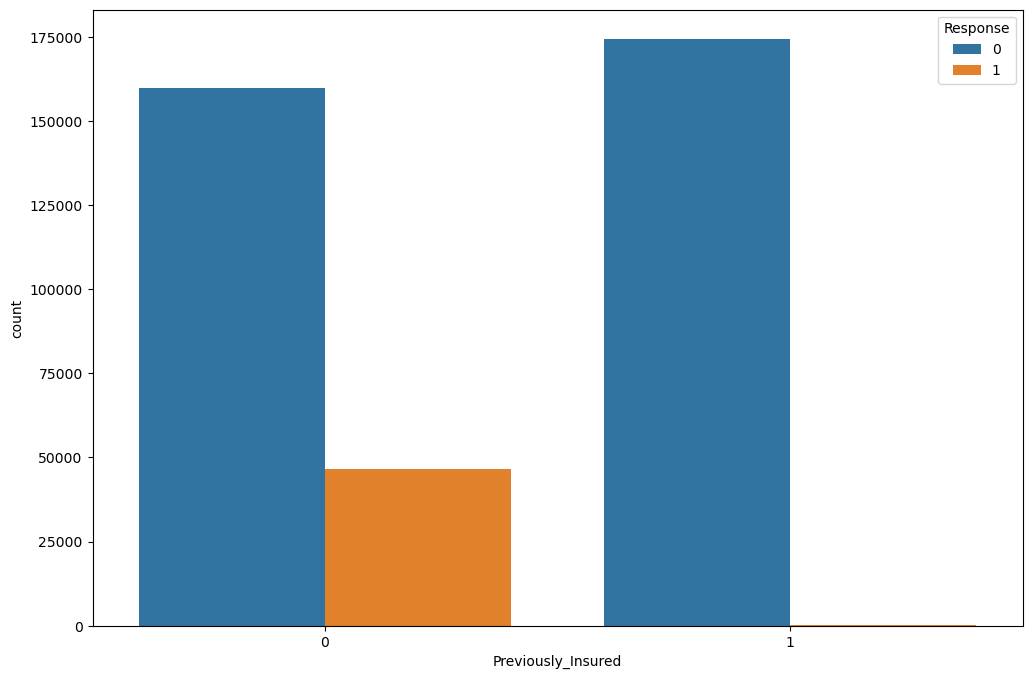

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='Previously_Insured', data = df, hue='Response')
plt.show()
# It clearly shows that people who are previously insured are not interested

C:\Users\Vairabharathi VR\AppData\Local\Temp\ipykernel_21712\2125702597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


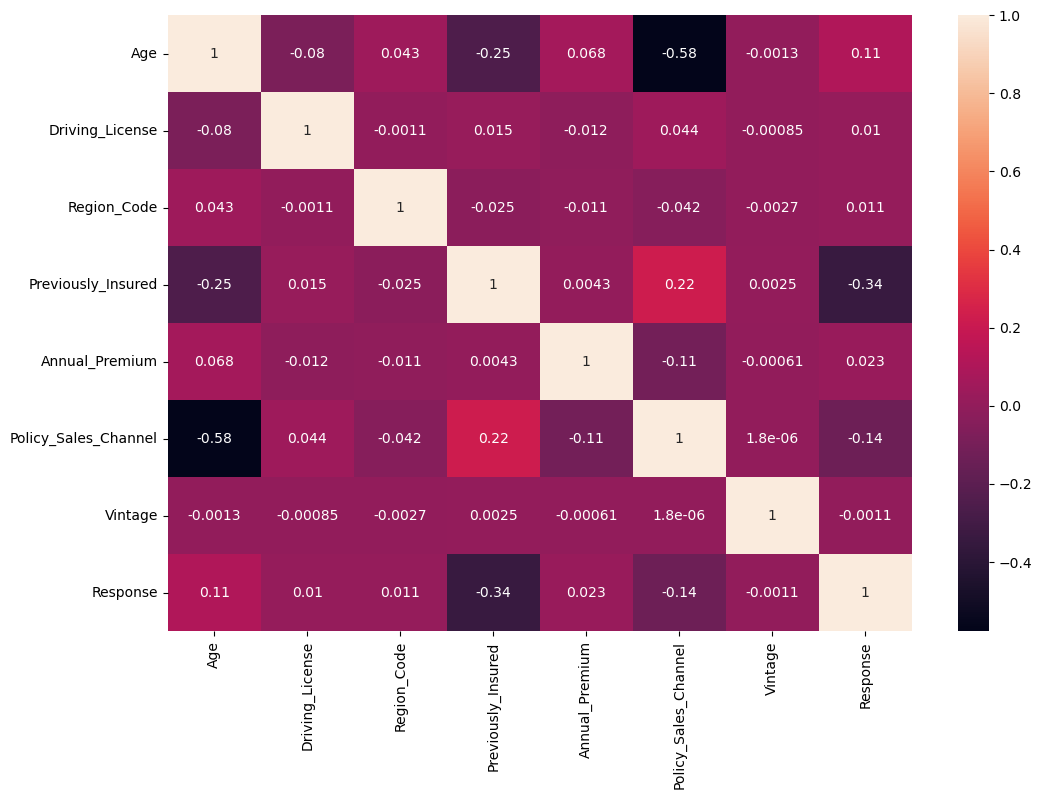

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()
# There is no much correlation between the variables (before encoding)

In [44]:
df1 = df.copy()
label = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df1[col] = label.fit_transform(df[col])

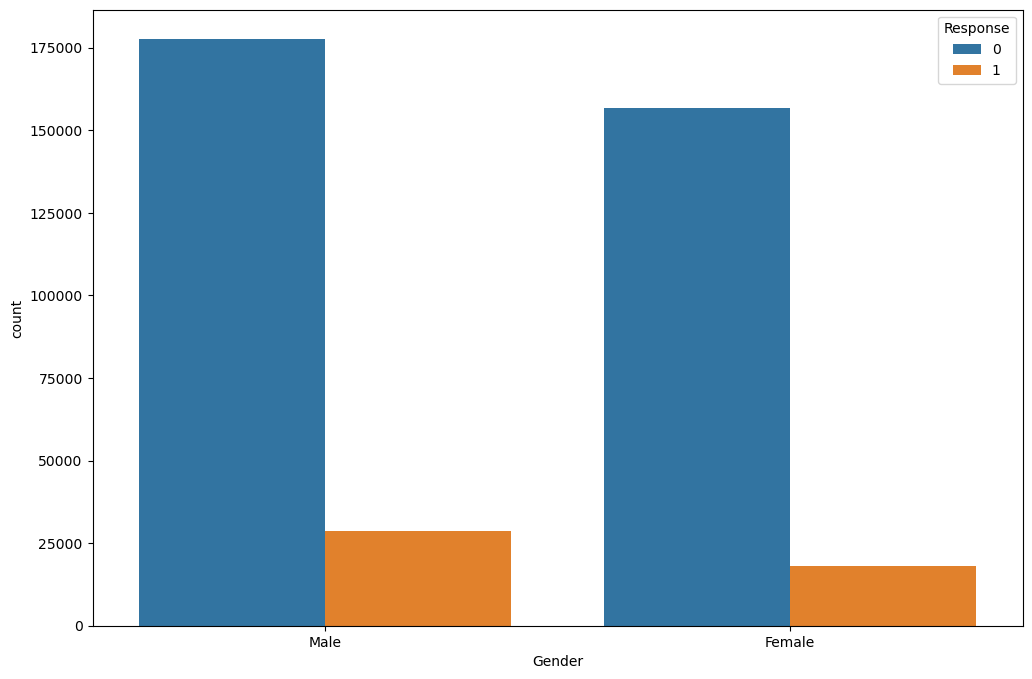

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='Gender', data = df, hue='Response')
plt.show()
# It shows that people who are interested in Insurance is so less, also Male are interesed
# more in insurance comparing to Female

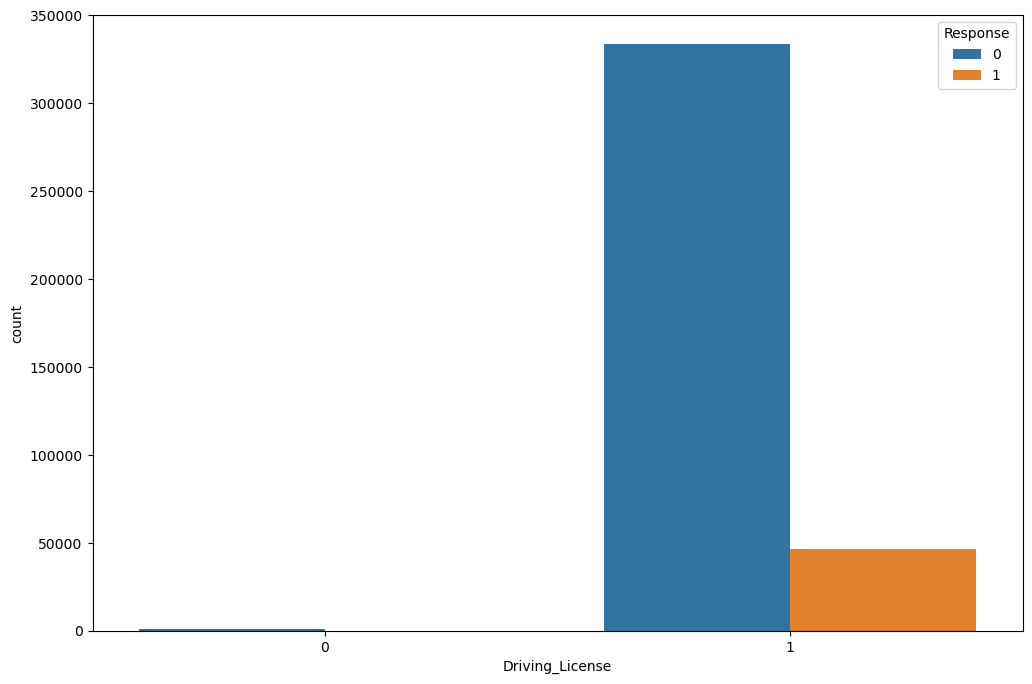

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='Driving_License', data = df, hue='Response')
plt.show()
# People who have DL doesn't need the Insurance, so we can neglect those people and only
# have to focus on people who have DL

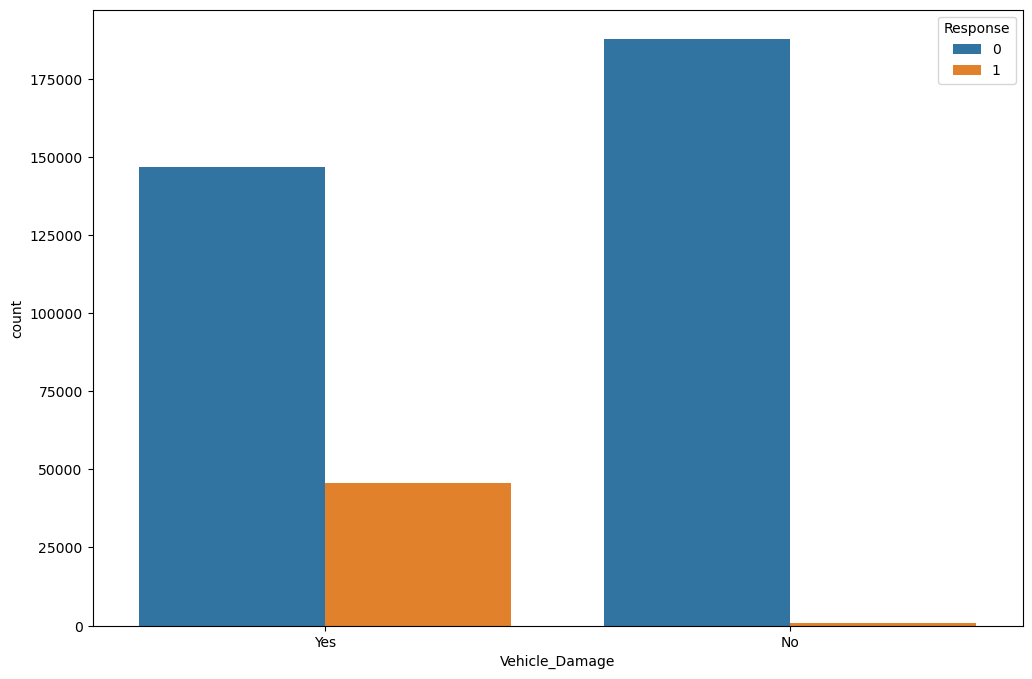

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x='Vehicle_Damage', data = df, hue='Response')
plt.show()
# Most of the people who have Vehicle damaged are getting Insurance, in this way
# we can target those people to sell our insurance

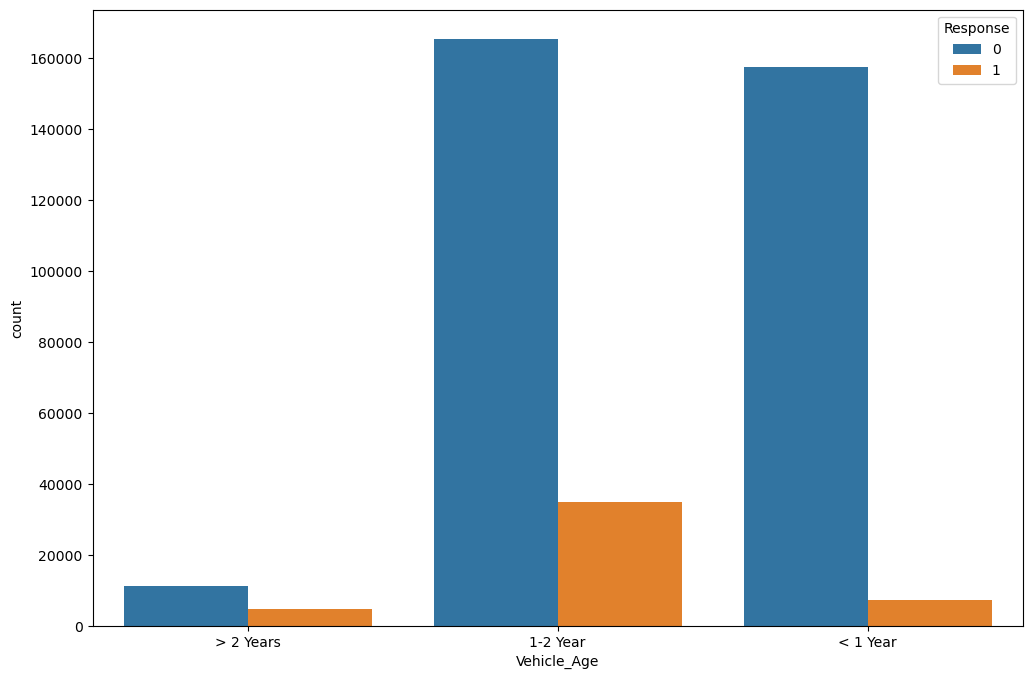

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='Vehicle_Age', data = df, hue='Response')
plt.show()
# people having vehicle age 1-2 year are like to get more insurance
# and most of the people who having vehicle age more than 2 years are getting insurance

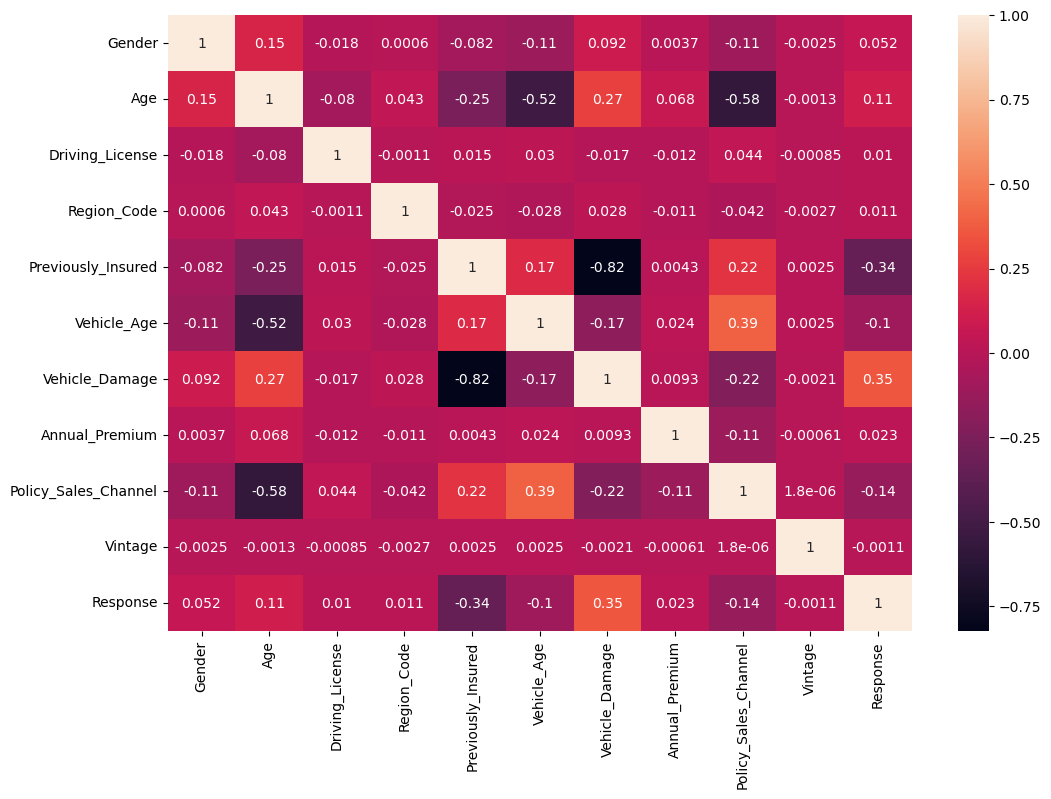

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()
# There is no much correlation between the variables (after encoding)

In [46]:
df1.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

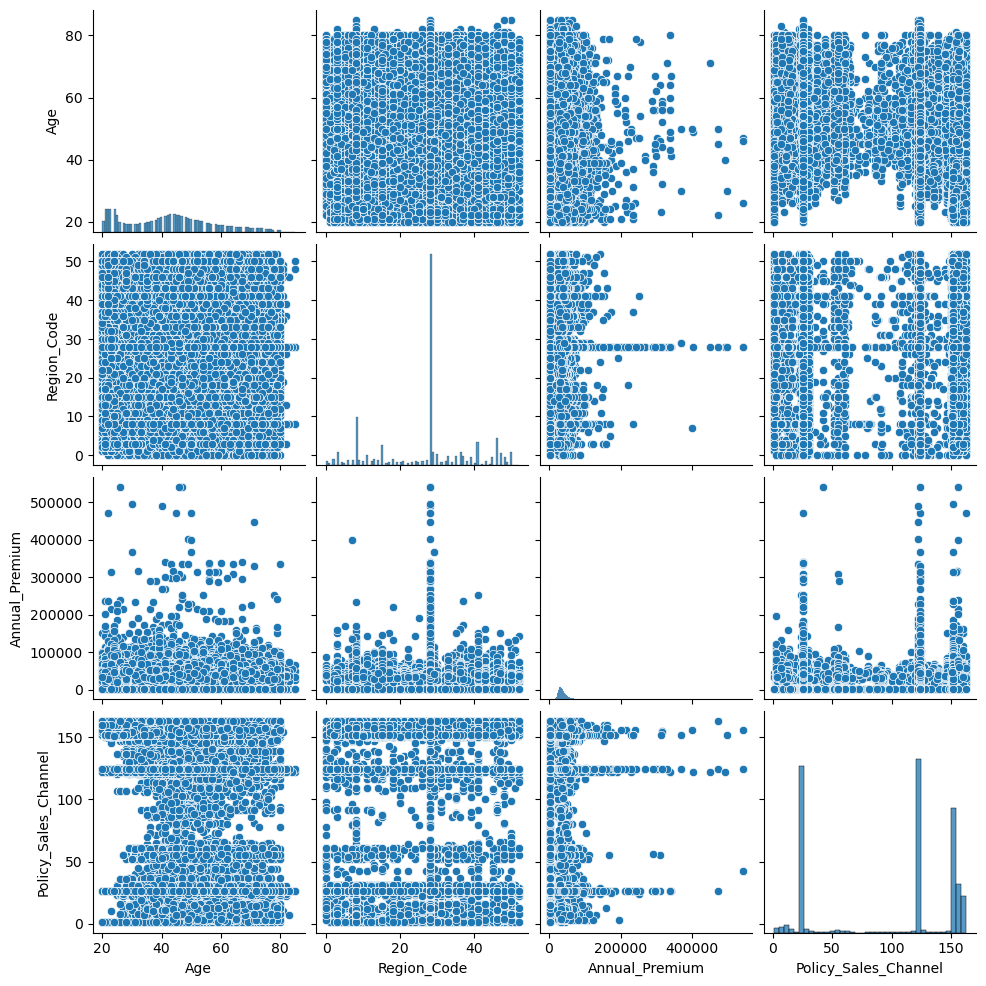

CPU times: total: 22.7 s
Wall time: 22.7 s


In [33]:
%%time
sns.pairplot(df1[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']])
plt.show()
# with this plot we can see the distribution of variable

# Model Planning

In [47]:
X = df1.drop(['Response'], axis=1)
y = df1['Response']

In [97]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=303, shuffle=True)

In [50]:
# Logistic 
log = LogisticRegression()
log_model = log.fit(X_train, y_train)
log_pred_train = log_model.predict(X_train)
log_pred_test = log_model.predict(X_test)

In [51]:
print(f'The accuracy score of the Logistic regression using training data is {accuracy_score(y_train, log_pred_train)}')
print(f'The accuracy score of the Logistic regression using testing data is {accuracy_score(y_test, log_pred_test)}')

The accuracy score of the Logistic regression using training data is 0.8765641040779043
The accuracy score of the Logistic regression using testing data is 0.8809267665503397


In [34]:
# Accuracy of both testing and training data is nearly equal so the model is ideal

In [52]:
# Decision Tree 
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
dtree_pred_train = dtree_model.predict(X_train)
dtree_pred_test = dtree_model.predict(X_test)

In [53]:
print(f'The accuracy score of the Decision tree using training data is {accuracy_score(y_train, dtree_pred_train)}')
print(f'The accuracy score of the Decision tree using testing data is {accuracy_score(y_test, dtree_pred_test)}')

The accuracy score of the Decision tree using training data is 0.9999048827926412
The accuracy score of the Decision tree using testing data is 0.824971792920679


In [54]:
# Here our model with decision tree is performing well with training data but 
# slighly overfit

In [55]:
# RandomForest
rf = RandomForestClassifier(max_depth=5)
rf_model = rf.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

In [56]:
print(f'The accuracy score of the Random Forest using training data is {accuracy_score(y_train, rf_pred_train)}')
print(f'The accuracy score of the Random Forest using testing data is {accuracy_score(y_test, rf_pred_test)}')

The accuracy score of the Random Forest using training data is 0.8765641040779043
The accuracy score of the Random Forest using testing data is 0.8809267665503397


In [60]:
%%time
# KNN error method
error = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(predict_i, y_test))

CPU times: total: 28min 44s
Wall time: 28min 44s


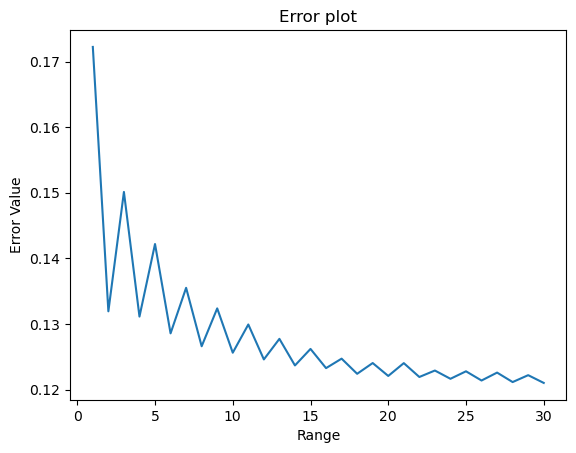

In [62]:
plt.plot(range(1,31), error)
plt.xlabel('Range')
plt.ylabel('Error Value')
plt.title('Error plot')
plt.show()

In [64]:
values = pd.Series(error)
min_error = values.idxmin()
print(f'The min error values is {min_error}')

The min error values is 29


In [65]:
error

[0.17223373829078215,
 0.1319304137912939,
 0.15012725984623865,
 0.13113011991288603,
 0.14218991892104638,
 0.12857180341633645,
 0.13551205688646317,
 0.12660386764975995,
 0.13237647923171791,
 0.1256198997664716,
 0.12992311930938572,
 0.12459657316785178,
 0.12773215082259715,
 0.12367820314344935,
 0.12619716092466737,
 0.12327149641835689,
 0.12471464931384635,
 0.12240560468106321,
 0.12404555115321036,
 0.12207761538663375,
 0.12403243158143318,
 0.12192018052530762,
 0.12290414840859598,
 0.12164466951798691,
 0.1227860722626013,
 0.1213822780824434,
 0.12258927868594371,
 0.12114612579045425,
 0.12219569153262833,
 0.12101493007268238]

In [66]:
km = KNeighborsClassifier(n_neighbors=29)
km_model = km.fit(X_train, y_train)
km_pred_train = km_model.predict(X_train)
km_pred_test = km_model.predict(X_test)

In [67]:
print(f'The accuracy score of the Kmeans Classifier using training data is {accuracy_score(y_train, km_pred_train)}')
print(f'The accuracy score of the Kmeans Classifier using testing data is {accuracy_score(y_test, km_pred_test)}')

The accuracy score of the Kmeans Classifier using training data is 0.8783680511140193
The accuracy score of the Kmeans Classifier using testing data is 0.8778043084673717


In [77]:
results = pd.DataFrame(columns=['Algorithm_name', 'Training_accuracy', 'Testing_accuracy', 'Precision_score', 'F1-score'])
results = results.append({
    'Algorithm_name' : 'Logistic_Regression',
    'Training_accuracy' : accuracy_score(y_train, log_pred_train),
    'Testing_accuracy' : accuracy_score(y_test, log_pred_test),
    'Precision_score' : precision_score(y_test, log_pred_test),
    'F1-score': f1_score(y_test, log_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'Decision_Tree',
    'Training_accuracy' : accuracy_score(y_train, dtree_pred_train),
    'Testing_accuracy' : accuracy_score(y_test, dtree_pred_test),
    'Precision_score' : precision_score(y_test, dtree_pred_test),
    'F1-score': f1_score(y_test, dtree_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'Random_Forest',
    'Training_accuracy' : accuracy_score(y_train, rf_pred_train),
    'Testing_accuracy' : accuracy_score(y_test, rf_pred_test),
    'Precision_score' : precision_score(y_test, rf_pred_test),
    'F1-score': f1_score(y_test, rf_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'K_nearest_neighbours',
    'Training_accuracy' : accuracy_score(y_train, km_pred_train),
    'Testing_accuracy' : accuracy_score(y_test, km_pred_test),
    'Precision_score' : precision_score(y_test, km_pred_test),
    'F1-score': f1_score(y_test, km_pred_test)}, ignore_index=True)

C:\Users\Vairabharathi VR\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vairabharathi VR\AppData\Local\Temp\ipykernel_21712\4101289104.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Vairabharathi VR\AppData\Local\Temp\ipykernel_21712\4101289104.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\Vairabharathi VR\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due 

In [78]:
results

,Algorithm_name,Training_accuracy,Testing_accuracy,Precision_score,F1-score
0,Logistic_Regression,0.876564,0.880927,0.000000,0.000000
1,Decision_Tree,0.999905,0.824972,0.282686,0.293716
2,Random_Forest,0.876564,0.880927,0.000000,0.000000
3,K_nearest_neighbours,0.878368,0.877804,0.382178,0.076542


In [82]:
# Since the KNN has the highest precision score we can conclude that for this project we can use the KNN model

In [106]:
# Saving the model
km = KNeighborsClassifier(n_neighbors=29)
km_model = km.fit(X_train, y_train)
joblib.dump(km_model, 'KNN_model.pkl')

['KNN_model.pkl']

In [91]:
# Deploying the model for a new dataset
df_test = pd.read_csv('E:/Health Insurance Prediction/test.csv')
df_test1 = df_test.drop(['id'], axis=1)
label = LabelEncoder()
for col in df_test1.select_dtypes(include='object').columns:
    df_test1[col] = label.fit_transform(df_test1[col])
df_test1 = scaler.fit_transform(df_test1)

In [95]:
df_test1

array([[ 0.92829407, -0.89008939,  0.04323292, ...,  0.31049188,
         0.73934864, -1.21105399],
       [ 0.92829407,  0.07979548,  0.04323292, ...,  0.19104824,
        -1.92748717, -0.51778208],
       [ 0.92829407,  0.53240842,  0.04323292, ...,  0.56212611,
         0.22437345,  0.53407873],
       ...,
       [ 0.92829407, -1.14872536,  0.04323292, ..., -0.04264584,
         0.73934864, -0.96004175],
       [ 0.92829407,  2.08422421,  0.04323292, ...,  1.90911281,
        -1.57803972,  1.32297434],
       [ 0.92829407,  0.14445447,  0.04323292, ..., -0.15329644,
         0.22437345,  0.91657357]])

In [107]:
model = joblib.load('KNN_model.pkl')
df_test1 = pd.DataFrame(df_test1, columns=['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'])
df_test1['Response'] = model.predict(df_test1)

C:\Users\Vairabharathi VR\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [108]:
df_test1['Response'].value_counts()

0    125259
1      1778
Name: Response, dtype: int64

In [109]:
df_test1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.928294,-0.890089,0.043233,-1.170327,1.083387,0.836715,-1.004995,0.310492,0.739349,-1.211054,0
1,0.928294,0.079795,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.191048,-1.927487,-0.517782,0
2,0.928294,0.532408,0.043233,0.116590,-0.923031,-0.895018,0.995030,0.562126,0.224373,0.534079,0
3,0.928294,-0.954748,0.043233,0.040889,1.083387,0.836715,0.995030,0.403143,0.739349,0.390643,0
4,0.928294,-0.760771,0.043233,0.116590,1.083387,0.836715,-1.004995,1.686159,0.739349,1.705469,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,-1.077245,-0.825430,0.043233,0.797899,1.083387,0.836715,-1.004995,0.020204,0.739349,-1.175195,0
127033,-1.077245,-0.049523,0.043233,0.116590,-0.923031,-0.895018,0.995030,-0.107679,0.187590,0.127678,0
127034,0.928294,-1.148725,0.043233,1.479208,1.083387,0.836715,-1.004995,-0.042646,0.739349,-0.960042,0
127035,0.928294,2.084224,0.043233,0.116590,1.083387,-0.895018,-1.004995,1.909113,-1.578040,1.322974,0
